In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
df = pd.read_csv('data.csv')
df

,height,weight
0,160,78
1,130,90
2,145,56
3,167,89
4,180,80
5,165,56
6,170,90


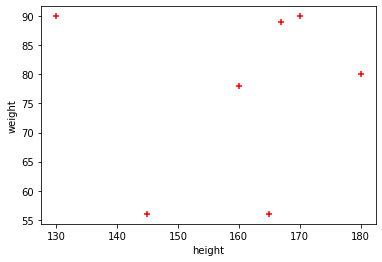

In [ ]:
%matplotlib inline
plt.xlabel('height')
plt.ylabel('weight')
plt.scatter(df.height,df.weight,color='red',marker='+')

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['height']],df.weight)

LinearRegression()

In [ ]:
reg.coef_

array([0.05536856])

In [ ]:
reg.intercept_

-40.043724696356264

In [ ]:
# y = a + bx
y = -40.043724696356264 + (0.5902834 * 145)
y


45.54736830364374

In [ ]:
d = pd.read_csv('data1.csv')
d.head()

,height
0,160
1,156
2,170
3,130
4,180


In [ ]:
p = reg.predict(d)
p

array([77.02372938, 76.80225513, 77.57741501, 75.3626725 , 78.13110064,
       77.3005722 ])

In [ ]:
d['weight'] = p
d

,height,weight
0,160,54.401619
1,156,52.040486
2,170,60.304453
3,130,36.693117
4,180,66.207287
5,165,57.353036


In [ ]:
d.to_csv('predicted.csv')

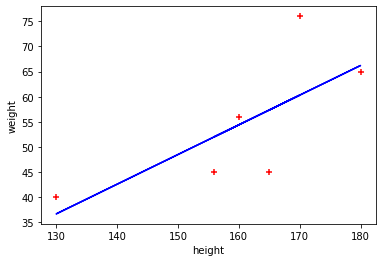

In [ ]:
%matplotlib inline
plt.xlabel('height')
plt.ylabel('weight')
plt.scatter(df.height,df.weight,color='red',marker='+')
plt.plot(d.height,reg.predict(d[['height']]),color='blue')

# Support Vector Machine

In [ ]:
import pandas as pd
data = pd.read_csv("fruits.csv")
data

,weight,size,class
0,69,4.39,Orange
1,69,4.21,Orange
2,65,4.09,Orange
3,72,5.85,Apple
4,67,4.70,Orange
5,73,5.68,Apple
6,70,5.56,Apple
7,75,5.11,Apple
8,74,5.36,Apple
9,65,4.27,Orange


Splitting the dataset into training and test samples

In [ ]:
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(data, test_size = 0.2, random_state = 1)

Classifying the predictors and target

In [ ]:
X_train = training_set.iloc[:,0:2].values
X_train

array([[65.  ,  4.09],
       [73.  ,  5.79],
       [67.  ,  4.7 ],
       [69.  ,  4.21],
       [68.  ,  4.47],
       [69.  ,  4.39],
       [74.  ,  5.22],
       [65.  ,  4.27],
       [74.  ,  5.36],
       [74.  ,  5.53],
       [70.  ,  5.47],
       [73.  ,  5.68]])

In [ ]:
Y_train = training_set.iloc[:,2].values
Y_train


array(['Orange', 'Apple', 'Orange', 'Orange', 'Orange', 'Orange', 'Apple',
       'Orange', 'Apple', 'Apple', 'Apple', 'Apple'], dtype=object)

In [ ]:
X_test = test_set.iloc[:,0:2].values
X_test


array([[72.  ,  5.85],
       [75.  ,  5.11],
       [70.  ,  5.56]])

In [ ]:

Y_test = test_set.iloc[:,2].values
Y_test

array(['Apple', 'Apple', 'Apple'], dtype=object)

Initializing Support Vector Machine and fitting the training datafrom sklearn.

In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier = SVC(kernel='linear', random_state = 1)
fit_reg=classifier.fit(X_train,Y_train)

Predicting the classes for test set

In [ ]:
Y_pred = classifier.predict(X_test)
Y_pred

array(['Apple', 'Apple', 'Apple'], dtype=object)

Attaching the predictions to test set for comparing

In [ ]:
test_set["Predictions"] = Y_pred
test_set

,weight,size,class,Predictions
3,72,5.85,Apple,Apple
7,75,5.11,Apple,Apple
6,70,5.56,Apple,Apple


Calculating the accuracy of the predictions using the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  1.0


# Support Vector Machine Coefficients, Intercepts Details

In [ ]:
import numpy as np
print('Vector of Weights (w) = ',classifier.coef_[0])
print('b =',classifier.intercept_[0])
print('Indices of Support Vectors = ',classifier.support_)
print('Support vectors = ', classifier.support_vectors_)
print('Number of support vectors for each class = ', classifier.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(classifier.dual_coef_))

Vector of Weights (w) =  [-0.92313623 -0.99698713]
b = 69.07317287701494
Indices of Support Vectors =  [10  5]
Support vectors =  [[70.    5.47]
 [69.    4.39]]
Number of support vectors for each class =  [1 1]
Coefficients of the support vector in the decision function =  [[0.92313623 0.92313623]]


In [ ]:
data

,weight,size,class
0,69,4.39,Orange
1,69,4.21,Orange
2,65,4.09,Orange
3,72,5.85,Apple
4,67,4.70,Orange
5,73,5.68,Apple
6,70,5.56,Apple
7,75,5.11,Apple
8,74,5.36,Apple
9,65,4.27,Orange


# Visualizing the classifier
Visualize user need to encode the classes ‘apple’ and ‘orange’ into numericals.We can achieve that using the label encoder.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.fit_transform(Y_test)
print(Y_train)
print(Y_test)

[1 0 1 1 1 1 0 1 0 0 0 0]
[0 0 0]


In [ ]:
import seaborn as sns
sns.set(font_scale=1.2)
import matplotlib.pyplot as plt

Fit the encoded data to the SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state = 1)
classifier.fit(X_train,Y_train)

SVC(kernel='linear', random_state=1)

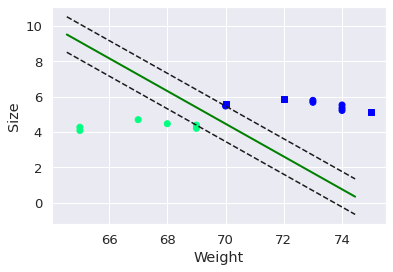

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap='winter')
plt.xlabel('Weight')
plt.ylabel('Size')
ax = plt.gca()
xlim = ax.get_xlim()

# w is the vector of weigts
w = classifier.coef_[0]
# find the slope of the hyperplane
slope = -w[0]/w[1]
b = classifier.intercept_[0]
# find the coordinates of the hyperplace
xx = np.linspace(xlim[0],xlim[1])
yy = slope * xx - (b/w[1])

#plot the margins
s = classifier.support_vectors_[0] # first support vector
yy_down = slope * xx +s[1] - slope * s[0]
s = classifier.support_vectors_[-1] #---last support vector---
yy_up = slope * xx + (s[1] - slope * s[0])

# plot the points
ax.scatter(X_test[:,0],X_test[:,1],c=Y_test,cmap='winter',marker='s')

# Plot the hyperplane
plt.plot(xx,yy,linewidth=2,color='green')

#---plot the 2 margins---
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.show()


# Visualizaing through meshgrid

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


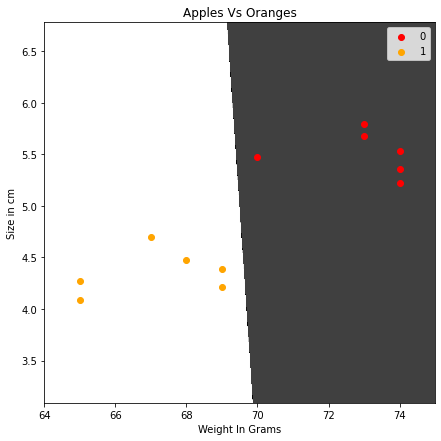

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.figure(figsize = (7,7))
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('red', 'orange'))(i), label = j)

plt.title('Apples Vs Oranges')
plt.xlabel('Weight In Grams')
plt.ylabel('Size in cm')
plt.legend()
plt.show()

Visualizing the predictions

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


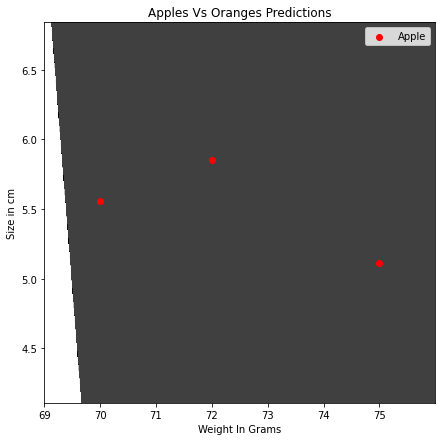

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.figure(figsize = (7,7))
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('red', 'orange'))(i), label = j)
plt.title('Apples Vs Oranges Predictions')
plt.xlabel('Weight In Grams')
plt.ylabel('Size in cm')
plt.legend()
plt.show()

# Kernel Trick

Sometimes, the points in a dataset are not always linearly separable.

**The kernel trick is
a technique in machine learning that transforms data into a higher dimension
space so that, after the transformation, it has a clear dividing margin between
classes of data.**

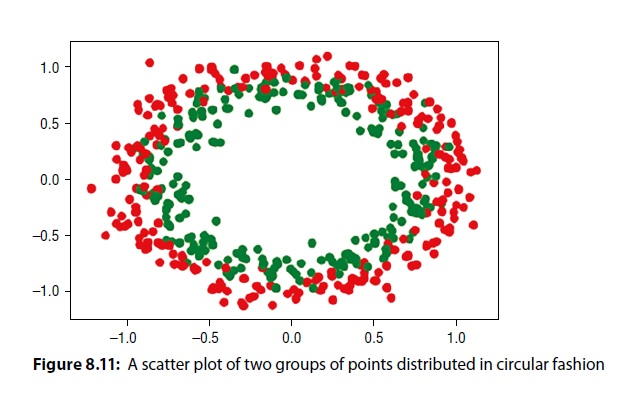

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles

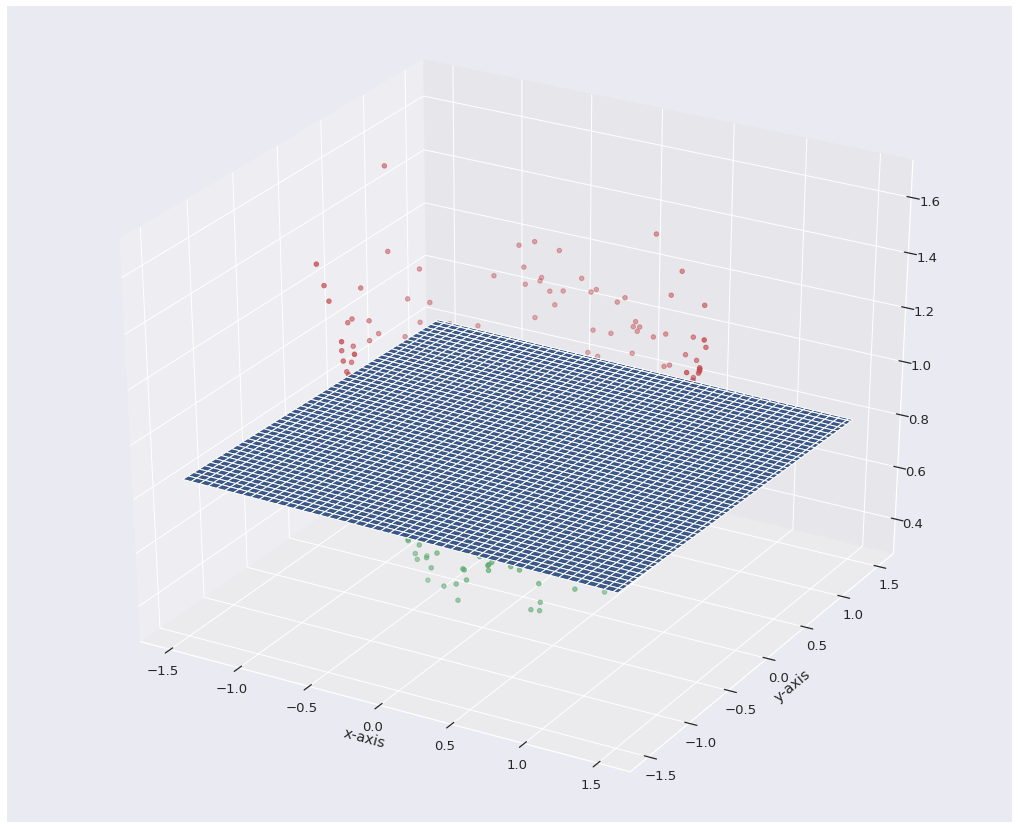

In [ ]:
#---X is features and c is the class labels---
X, c = make_circles(n_samples=500, noise=0.09)
z = X[:,0]**2 + X[:,1]**2
rgb = np.array(['r', 'g'])
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], z, color=rgb[c])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
# plt.show()
#---combine X (x-axis,y-axis) and z into single ndarray---
features = np.concatenate((X,z.reshape(-1,1)), axis=1)
#---use SVM for training---
from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(features, c)
x3 = lambda x,y: (-clf.intercept_[0] - clf.coef_[0][0] * x-clf.coef_[0][1] * y) / clf.coef_[0][2]
tmp = np.linspace(-1.5,1.5,100)
x,y = np.meshgrid(tmp,tmp)
ax.plot_surface(x, y, x3(x,y))
plt.show()